In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
cp=pd.read_csv('cpdataset.csv')
cp.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [9]:
cp.isnull().sum()


Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                 6517
Flag                     4
Flag Description        13
Note                219549
dtype: int64

In [11]:
def convert_units(row):
    if row['Unit'] == 'kg/ha':
        row['Value'] = row['Value'] / 1000  # convert kg to tonnes
        row['Unit'] = 't/ha'
    return row

cp = cp.apply(convert_units, axis=1)

# Create pivot table
pivot_cp = pd.pivot_table(
    cp,
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='first'  # or 'sum' if multiple values exist per combination
)


In [12]:
pivot_cp


Element                             Area harvested  Laying  Milk Animals  \
Area        Item              Year                                         
Afghanistan Almonds, in shell 2019         29203.0     NaN           NaN   
                              2020         22134.0     NaN           NaN   
                              2021         36862.0     NaN           NaN   
                              2022         36462.0     NaN           NaN   
                              2023         37000.0     NaN           NaN   
...                                            ...     ...           ...   
Zimbabwe    Vanilla, raw      2019            23.0     NaN           NaN   
                              2020            23.0     NaN           NaN   
                              2021            23.0     NaN           NaN   
                              2022            23.0     NaN           NaN   
                              2023            23.0     NaN           NaN   

Element                             Producing Animals/Slaughtered  Production  \
Area        Item              Year                                              
Afghanistan Almonds, in shell 2019                            NaN    38205.00   
                              2020                            NaN    39307.00   
                              2021                            NaN    64256.00   
                              2022                            NaN    63515.00   
                              2023                            NaN    67000.00   
...                                                           ...         ...   
Zimbabwe    Vanilla, raw      2019                            NaN        9.88   
                              2020                            NaN        9.93   
                              2021                            NaN        9.92   
                              2022                            NaN        9.91   
                              2023                            NaN        9.92   

Element                             Stocks   Yield  Yield/Carcass Weight  
Area        Item              Year                                        
Afghanistan Almonds, in shell 2019     NaN  1.3083                   NaN  
                              2020     NaN  1.7759                   NaN  
                              2021     NaN  1.7432                   NaN  
                              2022     NaN  1.7420                   NaN  
                              2023     NaN  1.8108                   NaN  
...                                    ...     ...                   ...  
Zimbabwe    Vanilla, raw      2019     NaN  0.4238                   NaN  
                              2020     NaN  0.4303                   NaN  
                              2021     NaN  0.4264                   NaN  
                              2022     NaN  0.4268                   NaN  
                              2023     NaN  0.4278                   NaN  

[92422 rows x 8 columns]

In [15]:
pivot_cp.isnull().sum()

Element
Area harvested                   44521
Laying                           91359
Milk Animals                     90314
Producing Animals/Slaughtered    74859
Production                       10478
Stocks                           83820
Yield                            41849
Yield/Carcass Weight             86115
dtype: int64

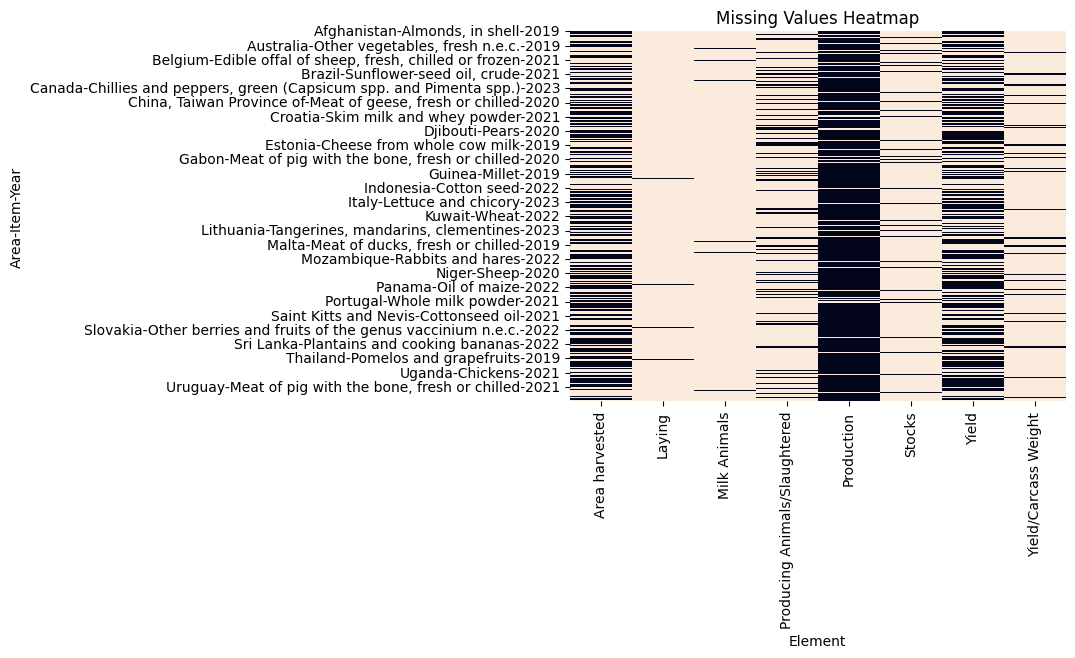

In [17]:
sns.heatmap(pivot_cp.isnull(),cbar=False) #cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [18]:
crop = pivot_cp.drop(['Laying', 'Milk Animals', 'Stocks','Yield/Carcass Weight','Producing Animals/Slaughtered'], axis=1)
crop

Element                             Area harvested  Production   Yield
Area        Item              Year                                    
Afghanistan Almonds, in shell 2019         29203.0    38205.00  1.3083
                              2020         22134.0    39307.00  1.7759
                              2021         36862.0    64256.00  1.7432
                              2022         36462.0    63515.00  1.7420
                              2023         37000.0    67000.00  1.8108
...                                            ...         ...     ...
Zimbabwe    Vanilla, raw      2019            23.0        9.88  0.4238
                              2020            23.0        9.93  0.4303
                              2021            23.0        9.92  0.4264
                              2022            23.0        9.91  0.4268
                              2023            23.0        9.92  0.4278

[92422 rows x 3 columns]

In [21]:
crop.to_csv('crop.csv', index=False)


In [23]:
crop1=crop.reset_index()
crop1

Element,Area,Item,Year,Area harvested,Production,Yield
0,Afghanistan,"Almonds, in shell",2019,29203.0,38205.00,1.3083
1,Afghanistan,"Almonds, in shell",2020,22134.0,39307.00,1.7759
2,Afghanistan,"Almonds, in shell",2021,36862.0,64256.00,1.7432
3,Afghanistan,"Almonds, in shell",2022,36462.0,63515.00,1.7420
4,Afghanistan,"Almonds, in shell",2023,37000.0,67000.00,1.8108
...,...,...,...,...,...,...
92417,Zimbabwe,"Vanilla, raw",2019,23.0,9.88,0.4238
92418,Zimbabwe,"Vanilla, raw",2020,23.0,9.93,0.4303
92419,Zimbabwe,"Vanilla, raw",2021,23.0,9.92,0.4264
92420,Zimbabwe,"Vanilla, raw",2022,23.0,9.91,0.4268


In [25]:
crop1.isnull().sum()

Element
Area                  0
Item                  0
Year                  0
Area harvested    44521
Production        10478
Yield             41849
dtype: int64

In [27]:
crop1.dtypes

Element
Area               object
Item               object
Year                int64
Area harvested    float64
Production        float64
Yield             float64
dtype: object

In [29]:
# Fill Area harvested
crop1['Area harvested'] = crop1.groupby(['Item', 'Year'])['Area harvested'].transform(lambda x: x.fillna(x.mean()))
crop1['Area harvested'] = crop1.groupby('Item')['Area harvested'].transform(lambda x: x.fillna(x.mean()))
crop1['Area harvested']=crop1['Area harvested'].fillna(crop1['Area harvested'].mean())
# Fill Yield
crop1['Yield'] = crop1.groupby(['Item', 'Year'])['Yield'].transform(lambda x: x.fillna(x.mean()))
crop1['Yield'] = crop1.groupby('Item')['Yield'].transform(lambda x: x.fillna(x.mean()))
crop1['Yield']=crop1['Yield'].fillna(crop1['Yield'].mean())

In [31]:
#to fill production 
crop1['Production']=crop1['Production'].fillna(crop1['Production'].mean())



In [33]:
crop1.isnull().sum()

Element
Area              0
Item              0
Year              0
Area harvested    0
Production        0
Yield             0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
crop1["Item_id"]=encoder.fit_transform(crop1["Item"])
crop1["Area_id"]=encoder.fit_transform(crop1["Area"])
crop1.head()


Element,Area,Item,Year,Area harvested,Production,Yield,Item_id,Area_id
0,Afghanistan,"Almonds, in shell",2019,29203.0,38205.0,1.3083,2,0
1,Afghanistan,"Almonds, in shell",2020,22134.0,39307.0,1.7759,2,0
2,Afghanistan,"Almonds, in shell",2021,36862.0,64256.0,1.7432,2,0
3,Afghanistan,"Almonds, in shell",2022,36462.0,63515.0,1.7420,2,0
4,Afghanistan,"Almonds, in shell",2023,37000.0,67000.0,1.8108,2,0


In [41]:
crop1.to_csv('croppro.csv',index=False)

In [43]:
min_val = crop1['Area harvested'].min()
max_val = crop1['Area harvested'].max()
print("Minimum Production:", min_val)
print("Maximum Production:", max_val)

Minimum Production: 0.0
Maximum Production: 47832000.0


In [45]:
min_val = crop1['Yield'].min()
max_val = crop1['Yield'].max()
print("Minimum Production:", min_val)
print("Maximum Production:", max_val)

Minimum Production: 0.0
Maximum Production: 254367.0


In [47]:
min_val = crop1['Year'].min()
max_val = crop1['Year'].max()
print("Minimum Production:", min_val)
print("Maximum Production:", max_val)

Minimum Production: 2019
Maximum Production: 2023


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = crop1[['Area harvested', 'Yield', 'Year']]
y = crop1['Production']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = models = {
    'LinearRegression':LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
   
}
for name, model in models.items():
    print(f"\n====== {name} ======")
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
# Evaluate
    print('R² Score:', r2_score(y_test, test_pred))
    print('RMSE:', mean_squared_error(y_test, test_pred))#, squared=False) )



====== LinearRegression ======
R² Score: 0.3812654857331693
RMSE: 43929898624039.95

====== Decision Tree ======
R² Score: 0.9519499890522105
RMSE: 3411531215971.7354

====== Random Forest ======
R² Score: 0.9494927265508998
RMSE: 3585995853204.9556

====== Gradient Boosting ======
R² Score: 0.9624467838399886
RMSE: 2666263059320.0073
